###### Working out an example based on [https://www.dataquest.io/blog/numpy-tutorial-python/]
###### https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Objective: 
    1. To go through the full data analysis process by nvestigating a wine dataset
    2. To determine wine quality ratings based on various chemical properties
    3. To learn to use numpy, pandas and matplotlib

### Sample Questions to ask:
    1. What chemical properties are most important in predicting the quality of a wine?
    2. Is a certain type of wine associated with higher qualitys?
    3. Do wines with higher alcoholic content recieve better ratings?
    4. Do sweeter wines recieve better rating?
    5. What level of acidity is associated with highest quality?

In [2]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df_red = pd.read_csv(r'C:\users\remya\Downloads\DAND\winequality-red.csv' , delimiter=';')
# How many samples of red wine are there?
# How many columns are in red dataset?

print(df_red.head()) 
print(df_red.info())
# How many unique values of quality are in the red wine dataset?
print(df_red['quality'].nunique())
#What is the mean density in the red wine dataset?
print(df_red['density'].mean())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
df_white = pd.read_csv(r'C:\users\remya\Downloads\DAND\winequality-white.csv' , delimiter=';')
#How many samples of white wine are there?
# How many columns are in white dataset?
# How many unique values of quality are in the white wine dataset?
print(df_white.count)
print(df_white.columns[df_white.isnull().any()])
# How many duplicate rows are in the white wine dataset?
print(sum(df_white.duplicated()))
print(df_white['quality'].nunique())

# Which features have missing values?
# Are duplicate rows in these datasets significant/ need to be dropped?

<bound method DataFrame.count of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.03

937
7


In [5]:
# Rename column
df_red=df_red.rename(columns = {'total_sulfur-dioxide':'total_sulfur_dioxide'})
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for NumPy’s repeat function. Take a look and try it yourself.


In [6]:
# create color array for red dataframe
color_red_single = np.array('red')
red_wine_count = len(df_red.index)
color_red = np.repeat(color_red_single, red_wine_count)
print(color_red)
# create color array for white dataframe
color_white_single = np.array('white')
white_wine_count = df_white.shape[0]
color_white = np.repeat(color_white_single, white_wine_count)
print(color_white)

['red' 'red' 'red' ... 'red' 'red' 'red']
['white' 'white' 'white' ... 'white' 'white' 'white']


Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.Do the same for the white dataframe and use head() to confirm the change.

In [7]:
df_red['color'] = color_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df_white['color'] = color_white
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [9]:
# append dataframes
wine_df = df_red.append(df_white)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Save Combined Dataset
Save your newly combined dataframe as winequality_edited.csv. Remember, set index=False to avoid saving with an unnamed column!

In [10]:
wine_df.to_csv(r'C:\users\remya\Downloads\DAND\winequality_edited.csv', index=False)
wine_df.shape
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Why aren't the columns merging correctly?
Names don't match

In [11]:
# Rename column
wine_df=wine_df.rename(columns = {'total sulfur dioxide':'total_sulfur_dioxide',
                               'fixed acidity':'fixed_acidity',
                                'volatile acidity':'volatile_acidity',
                                'citric acid':'citric_acid',
                                'residual sugar':'residual_sugar',
                                'free sulfur dioxide':'free_sulfur_dioxide',
                               })
wine_df.to_csv(r'C:\users\remya\Downloads\DAND\winequality_edited.csv', index=False)
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


How many rows are in the combined dataframe?
How many columns are in the combined dataframe?

Exploratory Data Analysis
Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol
Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

Histograms for Various Features

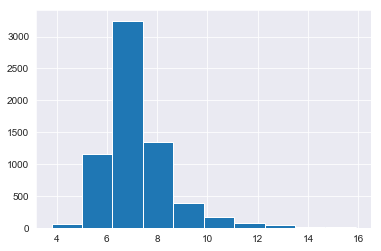

In [13]:
wine_df['fixed_acidity'].hist()

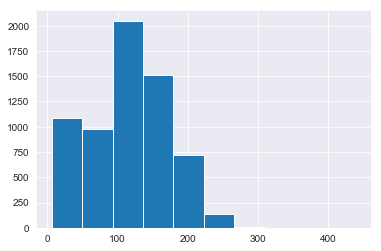

In [14]:
wine_df['total_sulfur_dioxide'].hist()

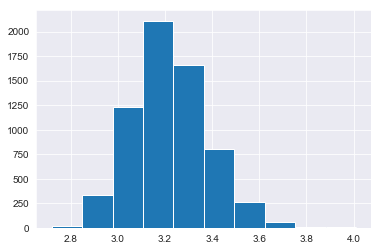

In [15]:
wine_df['pH'].hist()

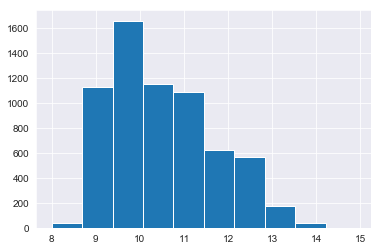

In [16]:
wine_df['alcohol'].hist()

Scatterplots of Quality Against Various Features

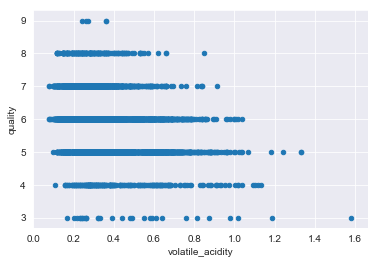

In [17]:
#Volatile Acidity, Residual Sugar, pH, Alcohol
wine_df.plot(x = 'volatile_acidity' , y = 'quality' , kind='scatter')

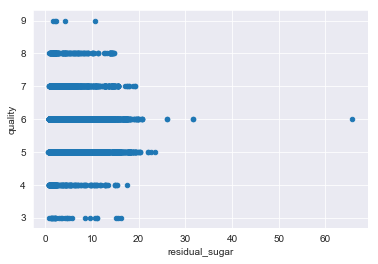

In [18]:
wine_df.plot(x = 'residual_sugar' , y = 'quality' , kind='scatter')

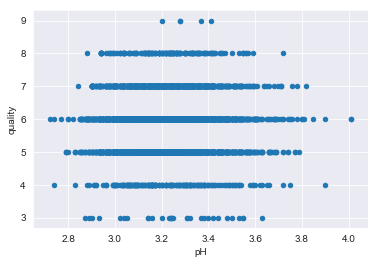

In [19]:
wine_df.plot(x = 'pH' , y = 'quality' , kind='scatter')

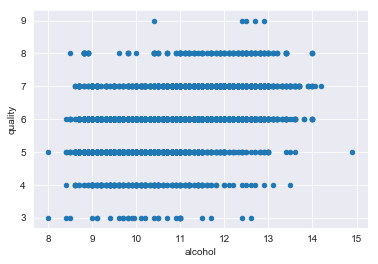

In [20]:
wine_df.plot(x = 'alcohol' , y = 'quality' , kind='scatter')

Drawing Conclusions (Using pandas groupby and query)
Is a certain type of wine (red or white) associated with higher quality?
What level of acidity (pH value) receives the highest average rating?
Is the mean quality of red wine greater than, less than, or equal to that of white wine?
What level of acidity receives the highest mean quality rating?

Do wines with higher alcoholic content receive better ratings?
Do sweeter wines (more residual sugar) receive better ratings?
Hint: use the median to split the samples into two groups by property and find the mean quality rating of each group.

In [21]:
# get the median amount of alcohol content
print(wine_df['alcohol'].median())

10.3


In [22]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [23]:
# get mean quality rating for the low alcohol and high alcohol groups
mean_la = low_alcohol['quality'].mean()
print(mean_la)
mean_ha = high_alcohol['quality'].mean()
print(mean_ha)

5.475920679886686
6.146084337349397


In [24]:
# get the median amount of residual sugar
median_rs = wine_df['residual_sugar'].median()
print(median_rs)

3.0


In [25]:
# select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < 3.0')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [26]:
# get mean quality rating for the low sugar and high sugar groups
mean_ls = low_sugar['quality'].mean()
print(mean_ls)
mean_hs = high_sugar['quality'].mean()
print(mean_hs)

5.808800743724822
5.82782874617737


In [27]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

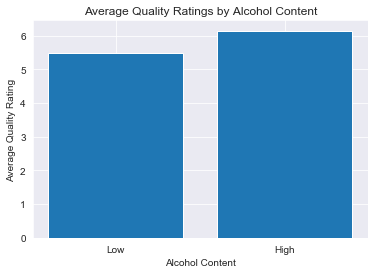

In [28]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

In [29]:
# Use query to select each group and get its mean quality

median_rs = wine_df['residual_sugar'].median()
low_rs = wine_df.query('residual_sugar < {}'.format(median_rs))
high_rs = wine_df.query('residual_sugar >= {}'.format(median_rs))

mean_quality_low_rs = low_rs['quality'].mean()
mean_quality_high_rs = high_rs['quality'].mean()

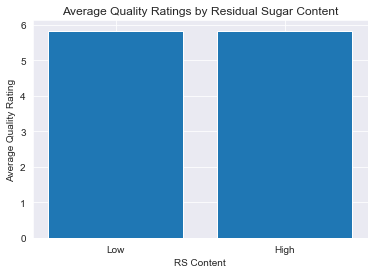

In [30]:
# Create a bar chart with proper labels

locations = [1, 2]
heights = [mean_quality_low_rs, mean_quality_high_rs]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Content')
plt.xlabel('RS Content')
plt.ylabel('Average Quality Rating');

In [31]:
# Find the mean quality of each wine type (red and white) with groupby
#df.groupby('quality').mean()
#df.groupby(['quality', 'color']).mean()
wine_df.groupby(['quality', 'color'], as_index=False).mean()
#df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [32]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [33]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72 ,3.11 ,3.21 ,3.32 ,4.01 ] # Fill in this list with five values you just found

# Labels for the four acidity level groups
bin_names = ['High' ,'Moderately High' ,'Medium' , 'Low'] # Name each acidity level category

In [34]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [35]:
# Use groupby to get the mean quality for each acidity level
mean_al = wine_df.groupby('acidity_levels').mean().quality

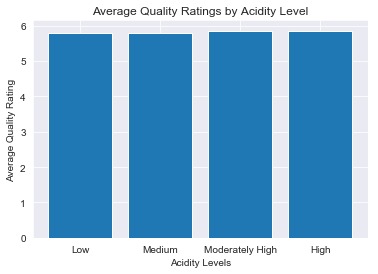

In [36]:
# Create a bar chart with proper labels

locations = [1,2,3,4]
heights = mean_al
labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');

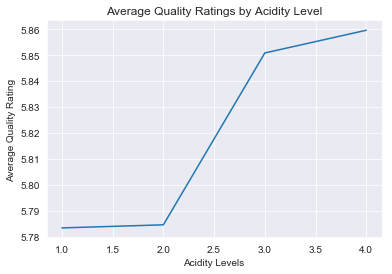

In [37]:
locations_line = [1,2,3,4]
heights_line = mean_al
#labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Levels')
plt.ylabel('Average Quality Rating');
plt.plot(locations_line, heights_line)
plt.show()


Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?
Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.

Red bar proportions = counts for each quality rating / total # of red samples
White bar proportions = counts for each quality rating / total # of white samples

In [38]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [39]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [40]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [41]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [42]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

ValueError: shape mismatch: objects cannot be broadcast to a single shape

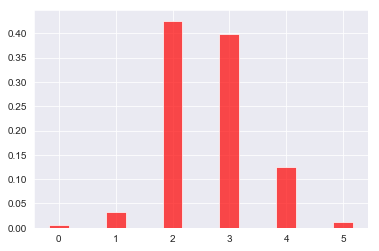

In [43]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = (ind + width) / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Oh, that didn't work because we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [ ]:
red_proportions['9'] = 0
red_proportions